In [1]:
from collections import defaultdict
import re

import os
import time

from matplotlib import pyplot as plt
import pandas as pn

In [2]:
def rssval(ts, conn):
    if ts == ts0:
        return 0
    else:
        if d[(ts, conn)] == 0:
            return rssval(ts-1, conn)
        else:
            return d[(ts, conn)]

In [4]:
ts0 = ts = 0
d = defaultdict(int)
apps = set()

with open("top.log") as f:
    for line in f:
        #print line
        if not ts:
            if line.startswith("14"):  # line with the timestamp
                ts = int(line.strip())
                if ts0 == 0:
                    ts0 = ts
            continue
        if line.startswith("+++"):
            if d:
                pass
                ##print "===", ts
                ##for k, v in sorted(d.items(), key=lambda x: -x[1]):
                ##    print k, ":", v, "%d" % (v/1000)
            #d = defaultdict(int)
            ts = 0
            continue
        if d != 0:
            vals  = re.split("\ *", line.strip())
            if len(vals) < 7:
                continue
            pid, user, cpu, rss, vsz, comm = vals[:6]
            if comm != "CMD" and rss != "0":
                d[(ts,comm)] += int(rss)
                apps.add(comm)

In [7]:
# form a top-7 application list:
app_max = dict(((a, max((d[(t,a)] for t in xrange(ts0, ts)))) for a in apps))
app_max = sorted(app_max.items(), key=lambda i: -i[1])
top7_app = [a for (a, _) in app_max[:7]]
for (t, a) in d.keys()[:]:
    if a not in top7_app:
        d[(t, 'OTHER')] += d[(t, a)]

ts_range = range(ts0 + 1, ts + 1)
apps_short = top7_app + ['OTHER']
apps_short

['postgres', 'dagflood', 'java', 'cpd', 'php-fpm', 'mgmtd', 'cli', 'OTHER']

In [8]:
# Create DataFrma for top-7 applications:
dd = pn.DataFrame(columns=apps_short, index=ts_range)
for a in apps_short:
    dd[a] = pn.Series( (rssval(t,a) for t in ts_range), index=ts_range)
dd.head()

,postgres,dagflood,java,cpd,php-fpm,mgmtd,cli,OTHER
1432687284,897052,0,6068340,556084,27304,30508,0,288044
1432687285,897052,0,6068340,556084,27304,30508,0,353936
1432687286,897052,0,6068340,556084,27304,30508,0,353936
1432687287,897052,0,6068340,556084,27304,30508,0,322676
1432687288,897052,0,6068340,556084,27304,30340,0,284992


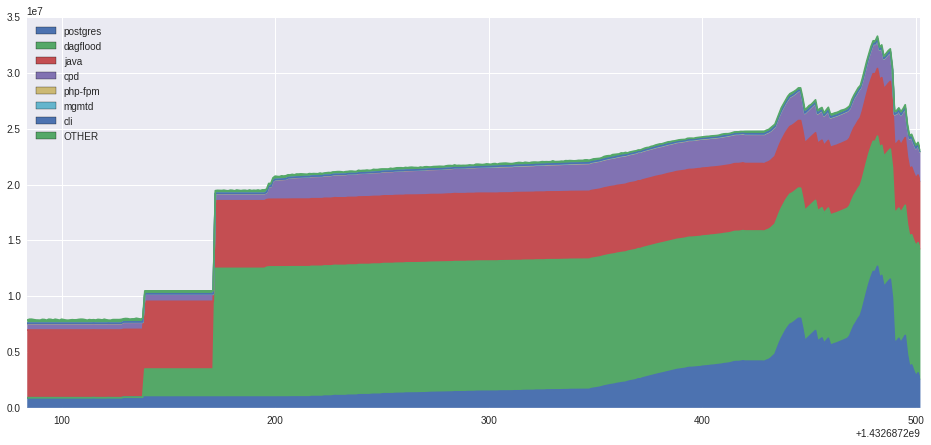

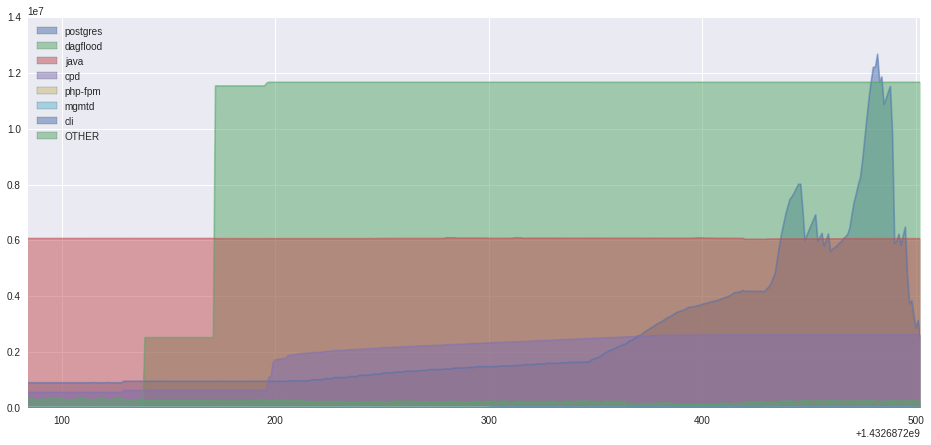

In [9]:
# Plot results:
import seaborn as sns
%matplotlib inline
sns.set_style("darkgrid")
#fig, axs = plt.subplots(2,1)
#dd.plot(kind="area", ax=axs[0] )
#dd.plot(kind="area", stacked=False, ax=axs[1] )
dd.plot(kind="area", figsize=(16,7))
dd.plot(kind="area", stacked=False, figsize=(16,7))